In [46]:
import torch
import numpy as np
from utils import visualize
import matplotlib
import matplotlib.pyplot as plt
import imageio
%matplotlib widget

In [97]:

def rotate_point_cloud_x(point_cloud, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(angle_radians), -np.sin(angle_radians)],
        [0, np.sin(angle_radians), np.cos(angle_radians)]
    ])
    rotated_points = np.dot(point_cloud, rotation_matrix.T)
    return rotated_points

def rotate_point_cloud_y(point_cloud, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), 0, np.sin(angle_radians)],
        [0, 1, 0],
        [-np.sin(angle_radians), 0, np.cos(angle_radians)]
    ])
    rotated_points = np.dot(point_cloud, rotation_matrix.T)
    return rotated_points

def rotate_point_cloud_z(point_cloud, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians), 0],
        [np.sin(angle_radians), np.cos(angle_radians), 0],
        [0, 0, 1]
    ])
    rotated_points = np.dot(point_cloud, rotation_matrix.T)
    return rotated_points

In [11]:
def load_pvd_output(filename: str) -> np.ndarray:
    """
    Loads the final output pointcloud of the Point-Voxel CNN from a file.
    """
    return torch.load(filename, map_location=torch.device('cpu')).numpy()[-1,:,:]

airplane = load_pvd_output("airplane_pc_data.pth")
car = load_pvd_output("car_pc_data.pth")
chair = load_pvd_output("chair_pc_data.pth")

In [117]:
def visualize_pointcloud(pc: np.ndarray, title: str = "", show_axis: bool = True, output: str = None):
    """Visualize the given pointcloud.

    Args:
        pc (np.ndarray): pointcloud
        title (str, optional): Diagram title. Defaults to "".
        show_axis (bool, optional): Show axis and background. Defaults to True.
        output (str, optional): Output file, does not save if None. Defaults to None.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', facecolor="none")

    pc = rotate_point_cloud_y(pc, -90)
    pc = rotate_point_cloud_x(pc, 90)

    # Depth color mapping
    depth = pc[:, 2]
    depth_colormap = plt.get_cmap('viridis')
    
    # Plot
    ax.scatter(pc[:,0], pc[:,1], pc[:,2], c=depth, cmap=depth_colormap)
        
    # Labels
    ax.set_xlabel("Z")
    ax.set_ylabel("X")
    ax.set_zlabel("Y")
    ax.set_title(title)
    
    # Setting the aspect ratio
    max_range = np.array([pc[:, 0].max()-pc[:, 0].min(), 
                        pc[:, 1].max()-pc[:, 1].min(), 
                        pc[:, 2].max()-pc[:, 2].min()]).max() / 2.0

    mid_x = (pc[:, 0].max()+pc[:, 0].min()) * 0.5
    mid_y = (pc[:, 1].max()+pc[:, 1].min()) * 0.5
    mid_z = (pc[:, 2].max()+pc[:, 2].min()) * 0.5

    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    
    if not show_axis:
        # Remove background & axis
        ax.set_facecolor((0, 0, 0, 0))  # Transparent background
        ax.grid(False)  # No grid
        ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # X axis line transparent
        ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Y axis line transparent
        ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Z axis line transparent
        ax.set_xticks([])  # No X ticks
        ax.set_yticks([])  # No Y ticks
        ax.set_zticks([])  # No Z ticks
        ax.xaxis.set_ticklabels([])  # No X tick labels
        ax.yaxis.set_ticklabels([])  # No Y tick labels
        ax.zaxis.set_ticklabels([])  # No Z tick labels

    ax.view_init(15, 0)

    if output is not None:
        fig.savefig(output, transparent=True)

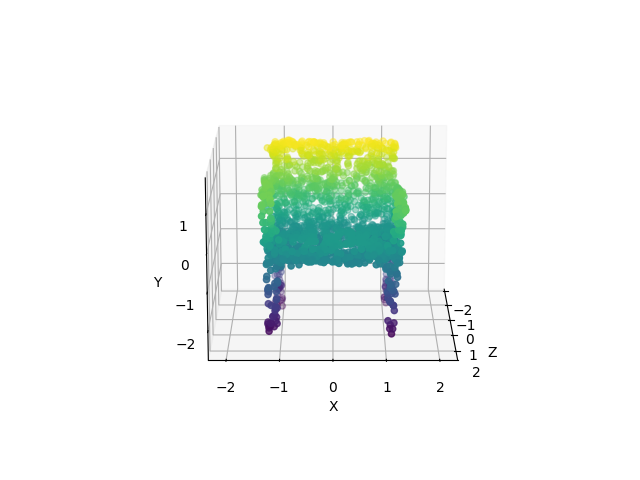

In [118]:
visualize_pointcloud(chair)

In [45]:
plt.savefig("chair.png")

/var/folders/vh/llls6_5n6rl27yqfhmcz75vm0000gn/T/ipykernel_56904/1495484990.py:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


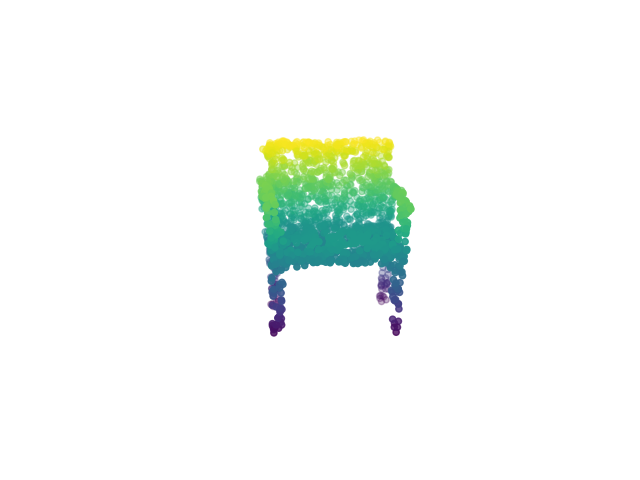

In [119]:
point_cloud = chair

point_cloud = rotate_point_cloud_y(point_cloud, -90)
point_cloud = rotate_point_cloud_x(point_cloud, 90)

# Setup plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
depth = point_cloud[:, 2]
depth_colormap = plt.get_cmap('viridis')
scatter = ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c=depth, cmap=depth_colormap)

# Remove axis
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')

# Setting the aspect ratio
max_range = np.array([point_cloud[:, 0].max()-point_cloud[:, 0].min(), 
                    point_cloud[:, 1].max()-point_cloud[:, 1].min(), 
                    point_cloud[:, 2].max()-point_cloud[:, 2].min()]).max() / 2.0

mid_x = (point_cloud[:, 0].max()+point_cloud[:, 0].min()) * 0.5
mid_y = (point_cloud[:, 1].max()+point_cloud[:, 1].min()) * 0.5
mid_z = (point_cloud[:, 2].max()+point_cloud[:, 2].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)
# Create frames
frames = []
for angle in range(0, 360, 5):  # Adjust range and step for different speed/number of frames
    ax.view_init(15, angle)
    filename = f"visuals/frame_{angle}.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    frames.append(imageio.imread(filename))

# Create GIF
imageio.mimsave('point_cloud_rotation.gif', frames, duration=40)